In [1]:
# checking gpu hardware accelerator
!nvidia-smi

Sat Dec 21 13:34:40 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
# installing yolo

!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.7/112.6 GB disk)


In [4]:
from ultralytics import YOLO
from IPython.display import display, Image

In [5]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# getting processed data
!unzip /content/drive/MyDrive/Thesis/processed_data.zip

Streaming output truncated to the last 5000 lines.
  inflating: processed_data/val/images/58361_frame_0.jpg  
  inflating: processed_data/val/images/58361_frame_20.jpg  
  inflating: processed_data/val/images/58361_frame_40.jpg  
  inflating: processed_data/val/images/58361_frame_60.jpg  
  inflating: processed_data/val/images/58361_frame_80.jpg  
  inflating: processed_data/val/images/58497_frame_0.jpg  
  inflating: processed_data/val/images/58497_frame_100.jpg  
  inflating: processed_data/val/images/58497_frame_20.jpg  
  inflating: processed_data/val/images/58497_frame_40.jpg  
  inflating: processed_data/val/images/58497_frame_60.jpg  
  inflating: processed_data/val/images/58497_frame_80.jpg  
  inflating: processed_data/val/images/58591_frame_0.jpg  
  inflating: processed_data/val/images/58591_frame_20.jpg  
  inflating: processed_data/val/images/58591_frame_40.jpg  
  inflating: processed_data/val/images/58591_frame_60.jpg  
  inflating: processed_data/val/images/58591_frame_

In [7]:
# training yolo v8 model on custom dataset
!yolo task=detect mode=train model=yolov8s.pt data=/content/drive/MyDrive/data.yaml epochs=25 imgsz=800 plots=True

100% 21.5M/21.5M [00:00<00:00, 38.7MB/s]
New https://pypi.org/project/ultralytics/8.3.52 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, ret

In [8]:
model = YOLO('/content/runs/detect/train/weights/best.pt')
model.info()

Model summary: 225 layers, 11,329,100 parameters, 0 gradients, 29.7 GFLOPs


(225, 11329100, 0, 29.720012800000003)

In [11]:
model

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(96, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_s

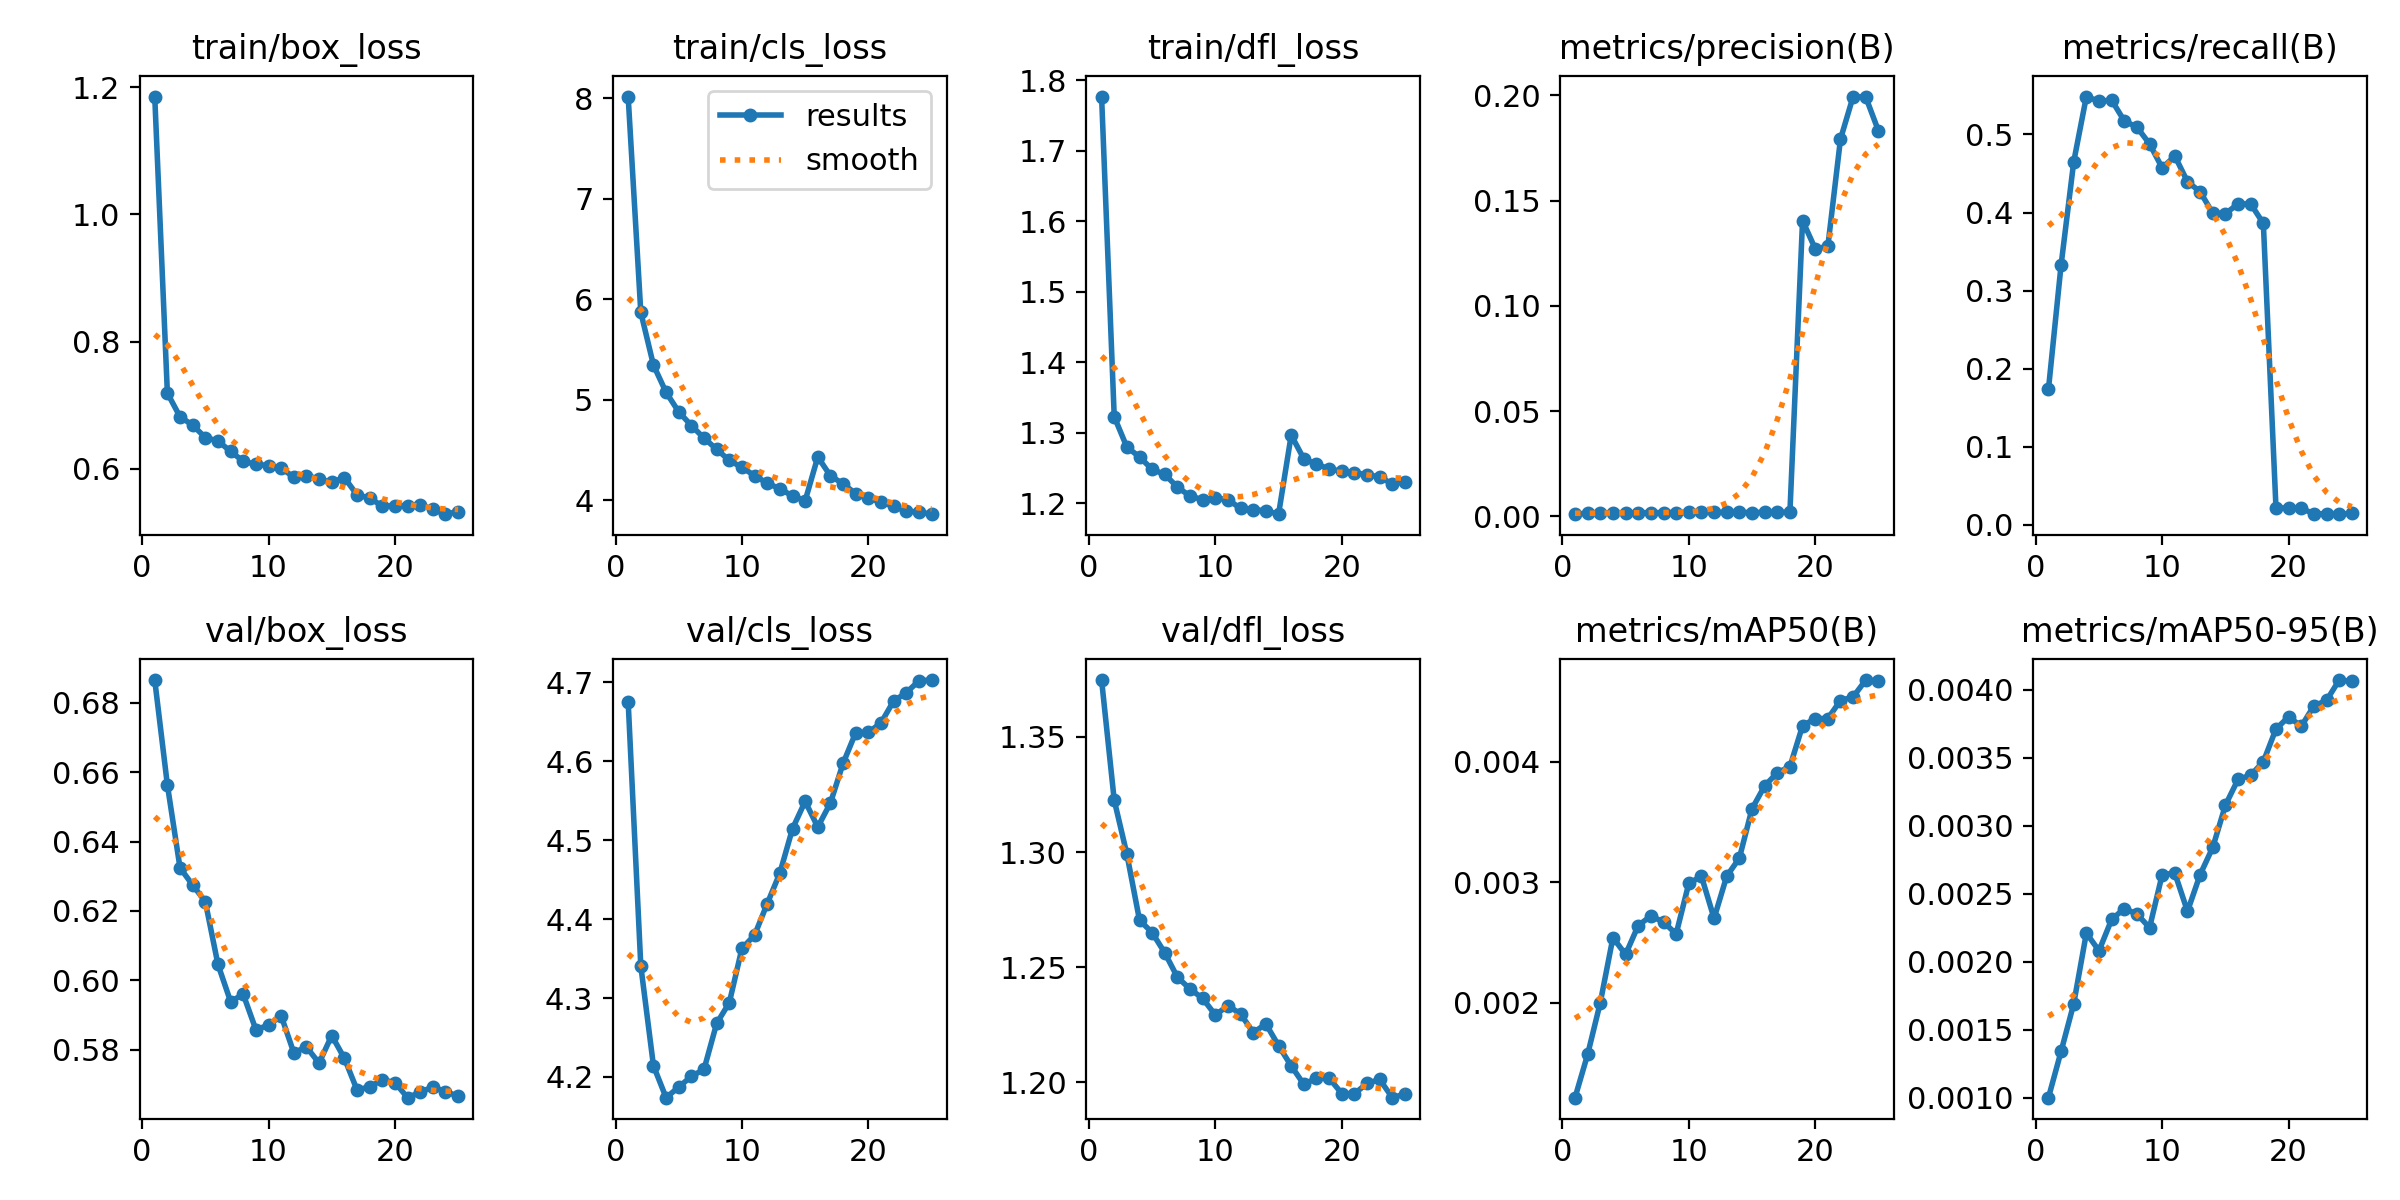

In [14]:
# showing metrics
Image(filename='/content/runs/detect/train/results.png', width=600)

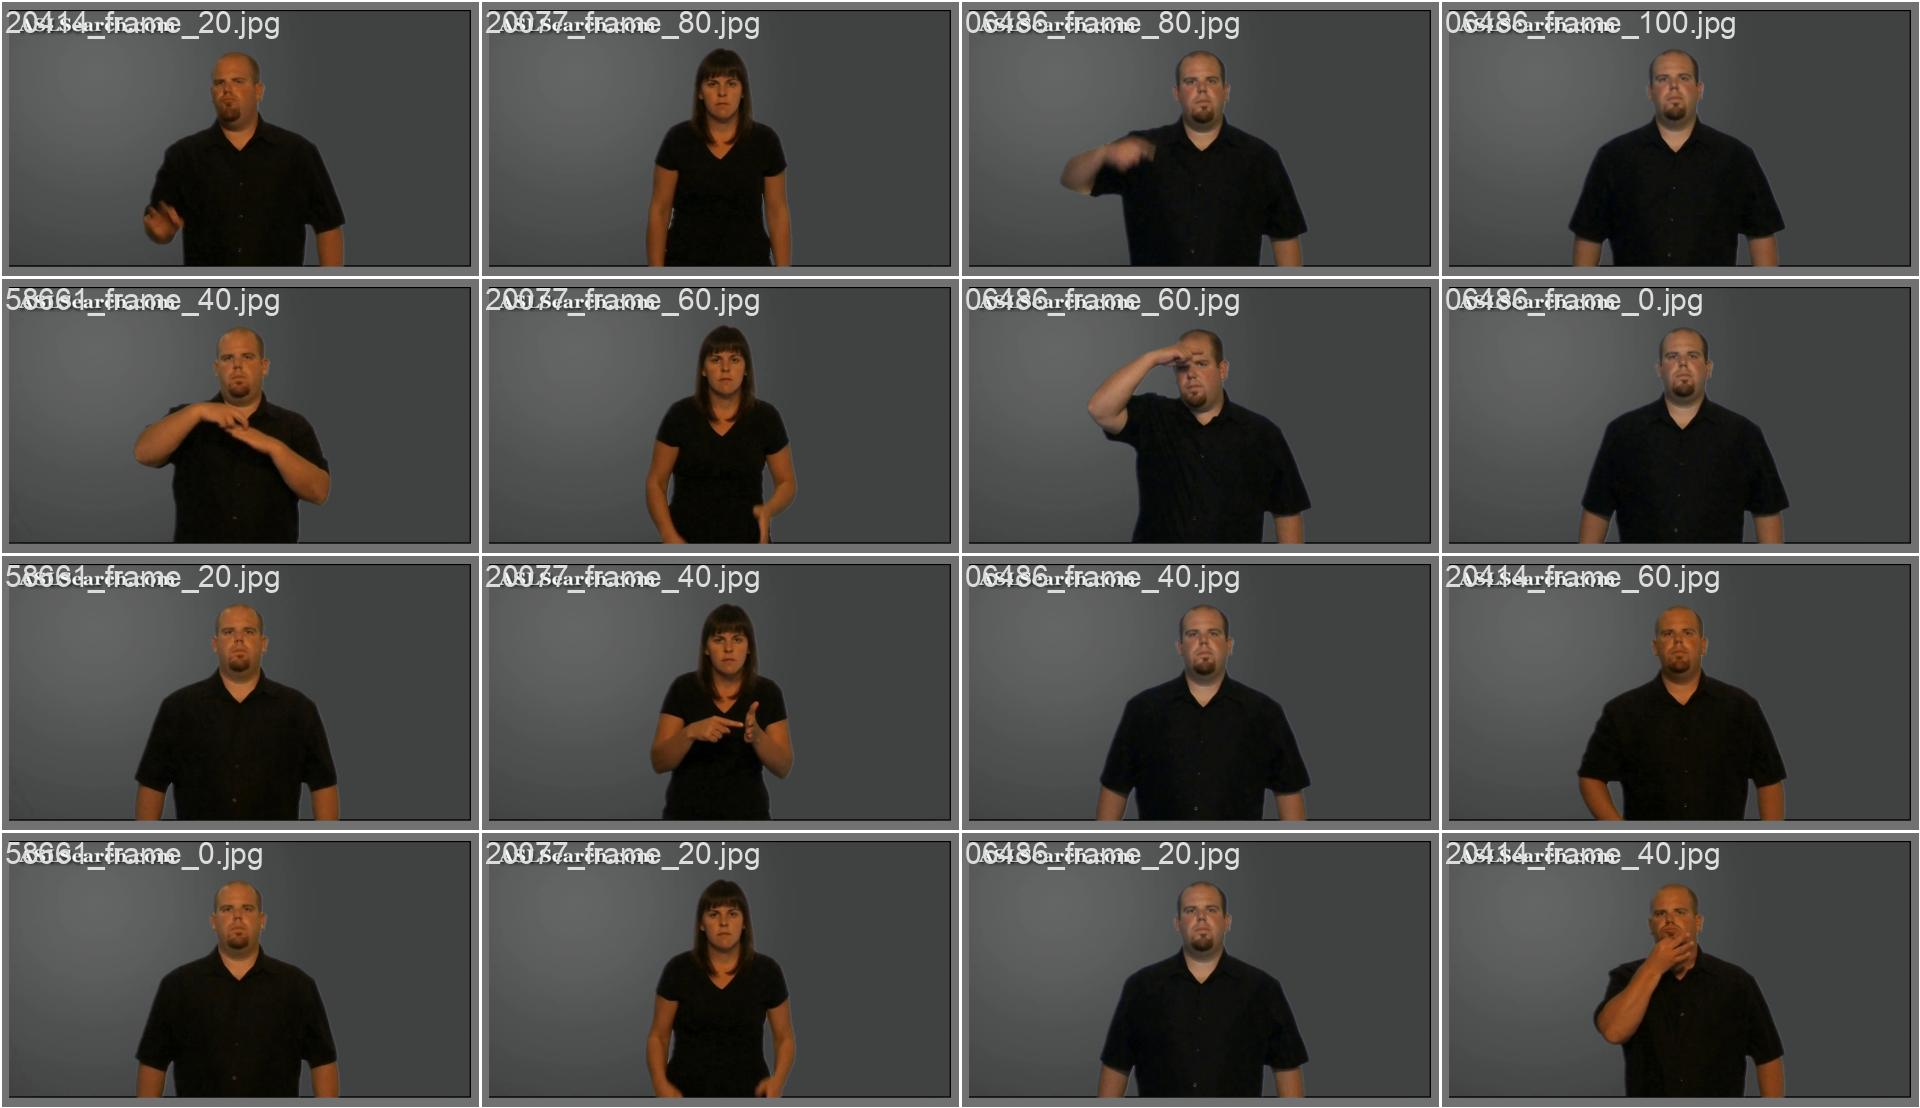

In [15]:
Image(filename='/content/runs/detect/train/val_batch0_pred.jpg', width=600)

In [17]:
# validate

%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data=/content/drive/MyDrive/data.yaml

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,319,084 parameters, 0 gradients, 29.5 GFLOPs
val: Scanning /content/processed_data/train/labels.cache... 12092 images, 0 backgrounds, 10 corrupt: 100% 12092/12092 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/processed_data/train/images/17086_frame_0.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.5918]
val: WARNING ⚠️ /content/processed_data/train/images/17086_frame_20.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.5918]
val: WARNING ⚠️ /content/processed_data/train/images/17086_frame_40.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.5918]
val: WARNING ⚠️ /content/processed_data/train/images/17086_frame_60.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.5918]
val: WARNING ⚠️ /content/processed_data/tr

In [18]:
# save model weights
!cp /content/runs/detect/train/weights/best.pt /content/drive/MyDrive/best.pt


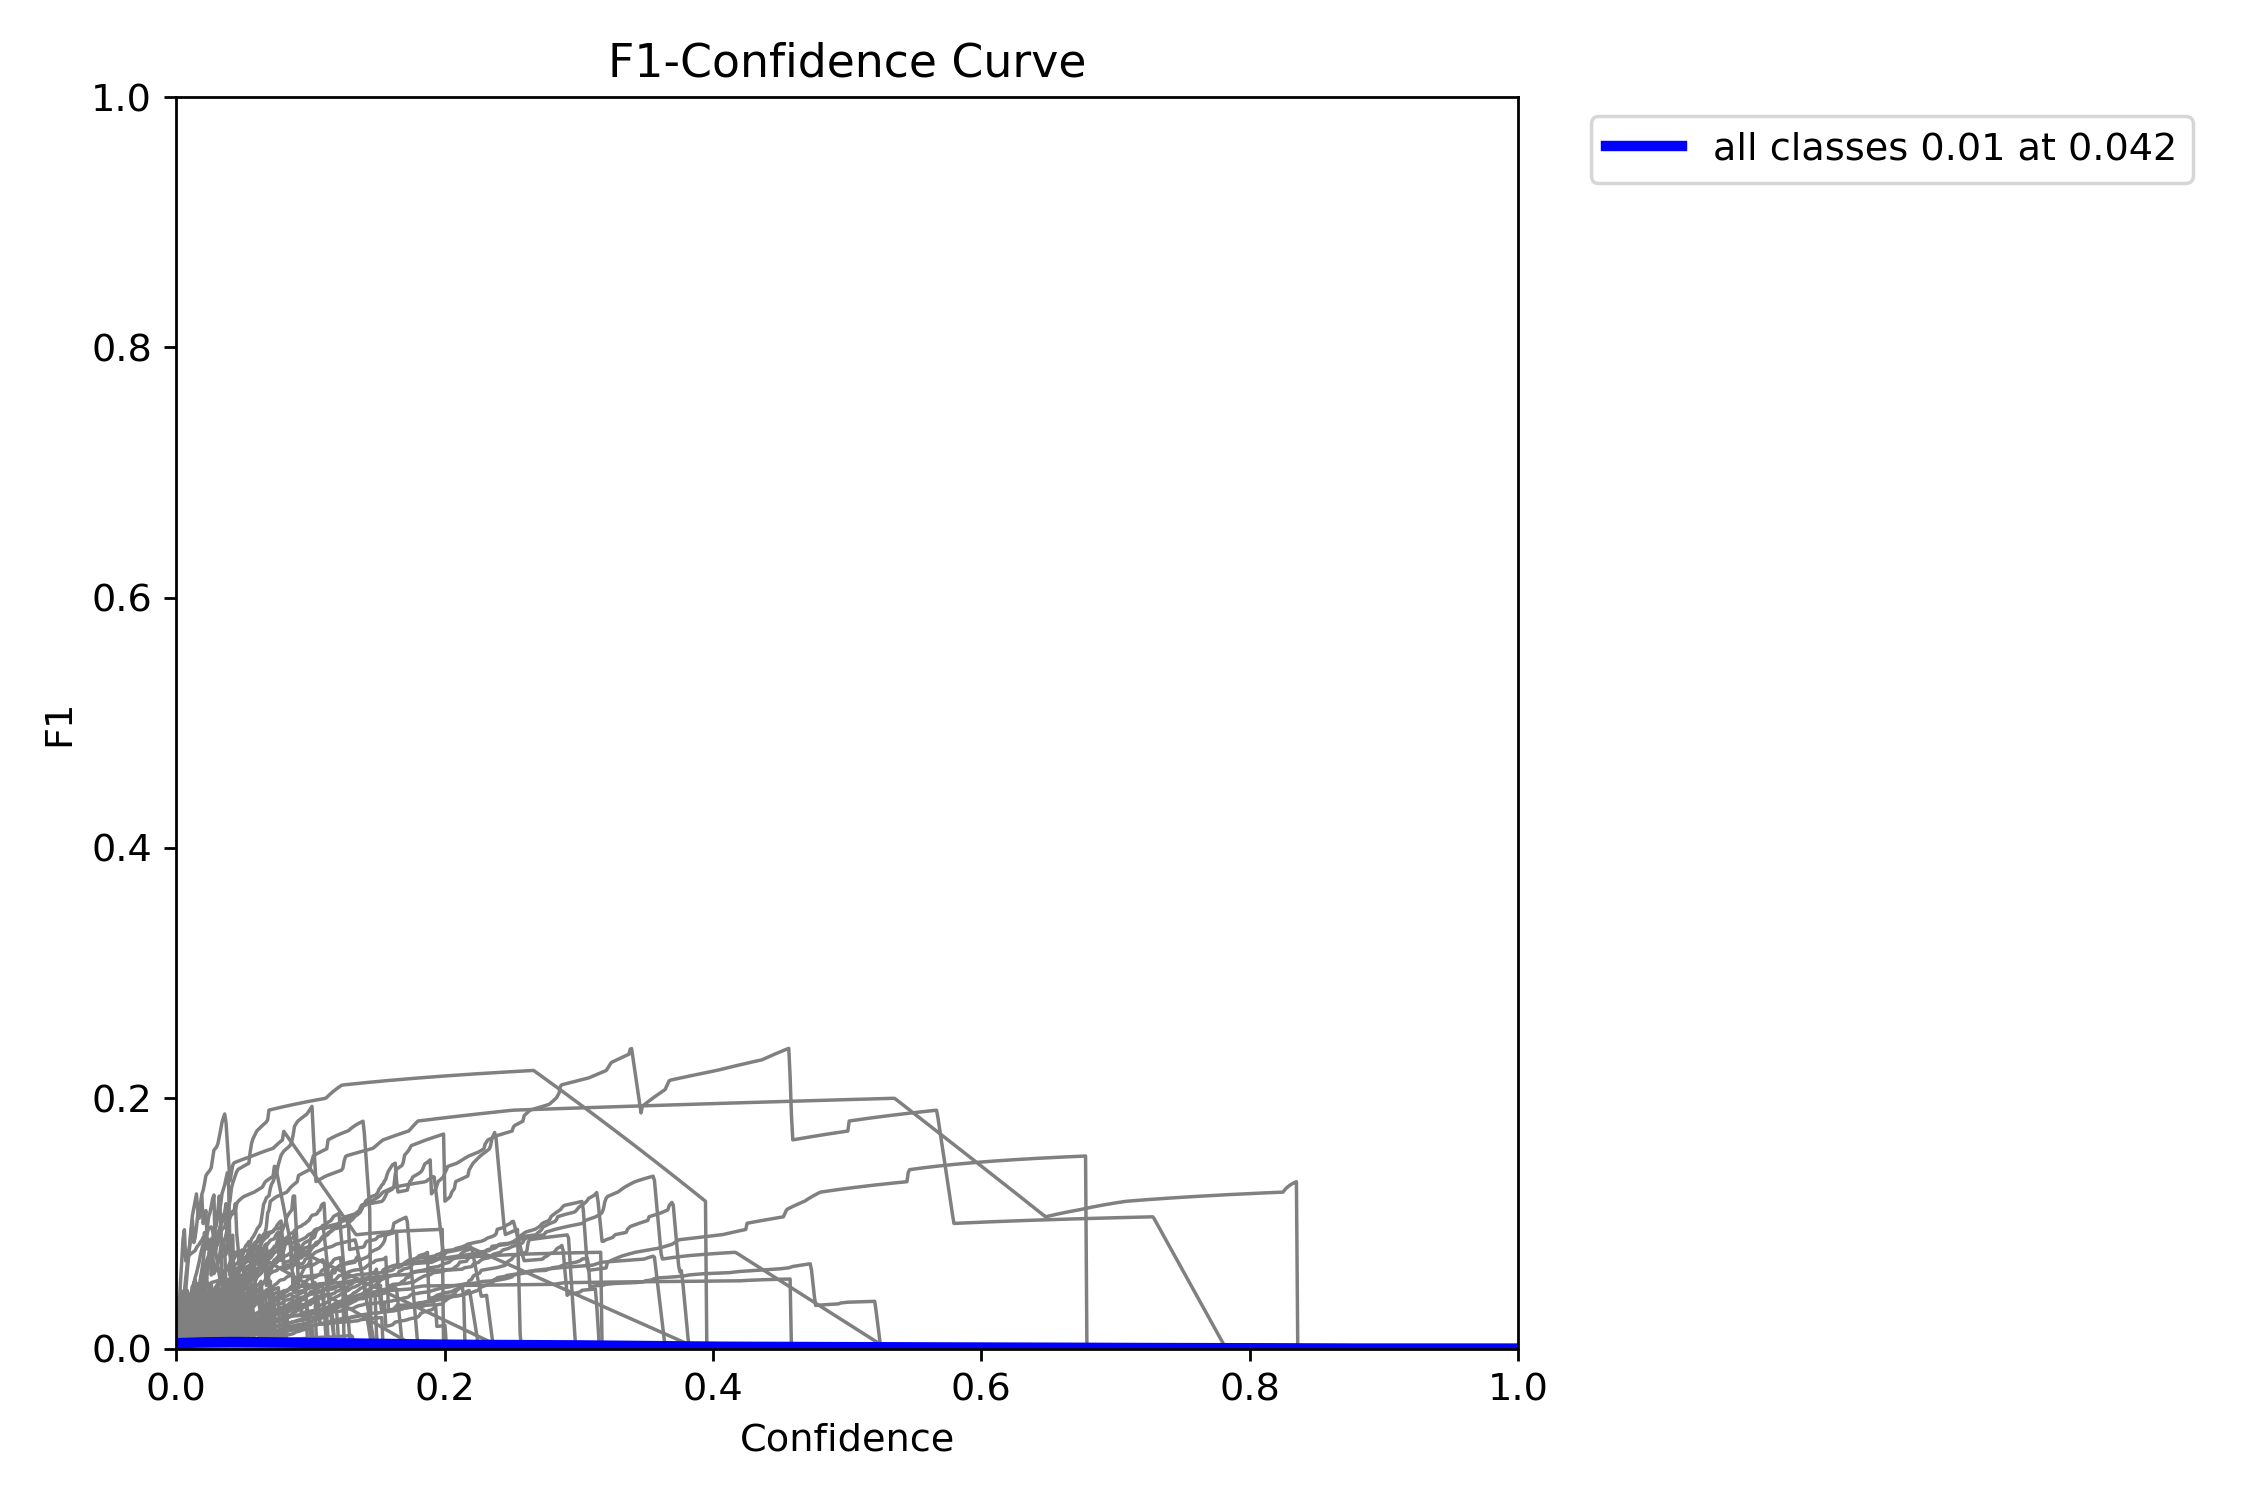

In [21]:
Image(filename='/content/runs/detect/val/F1_curve.png', width=600)

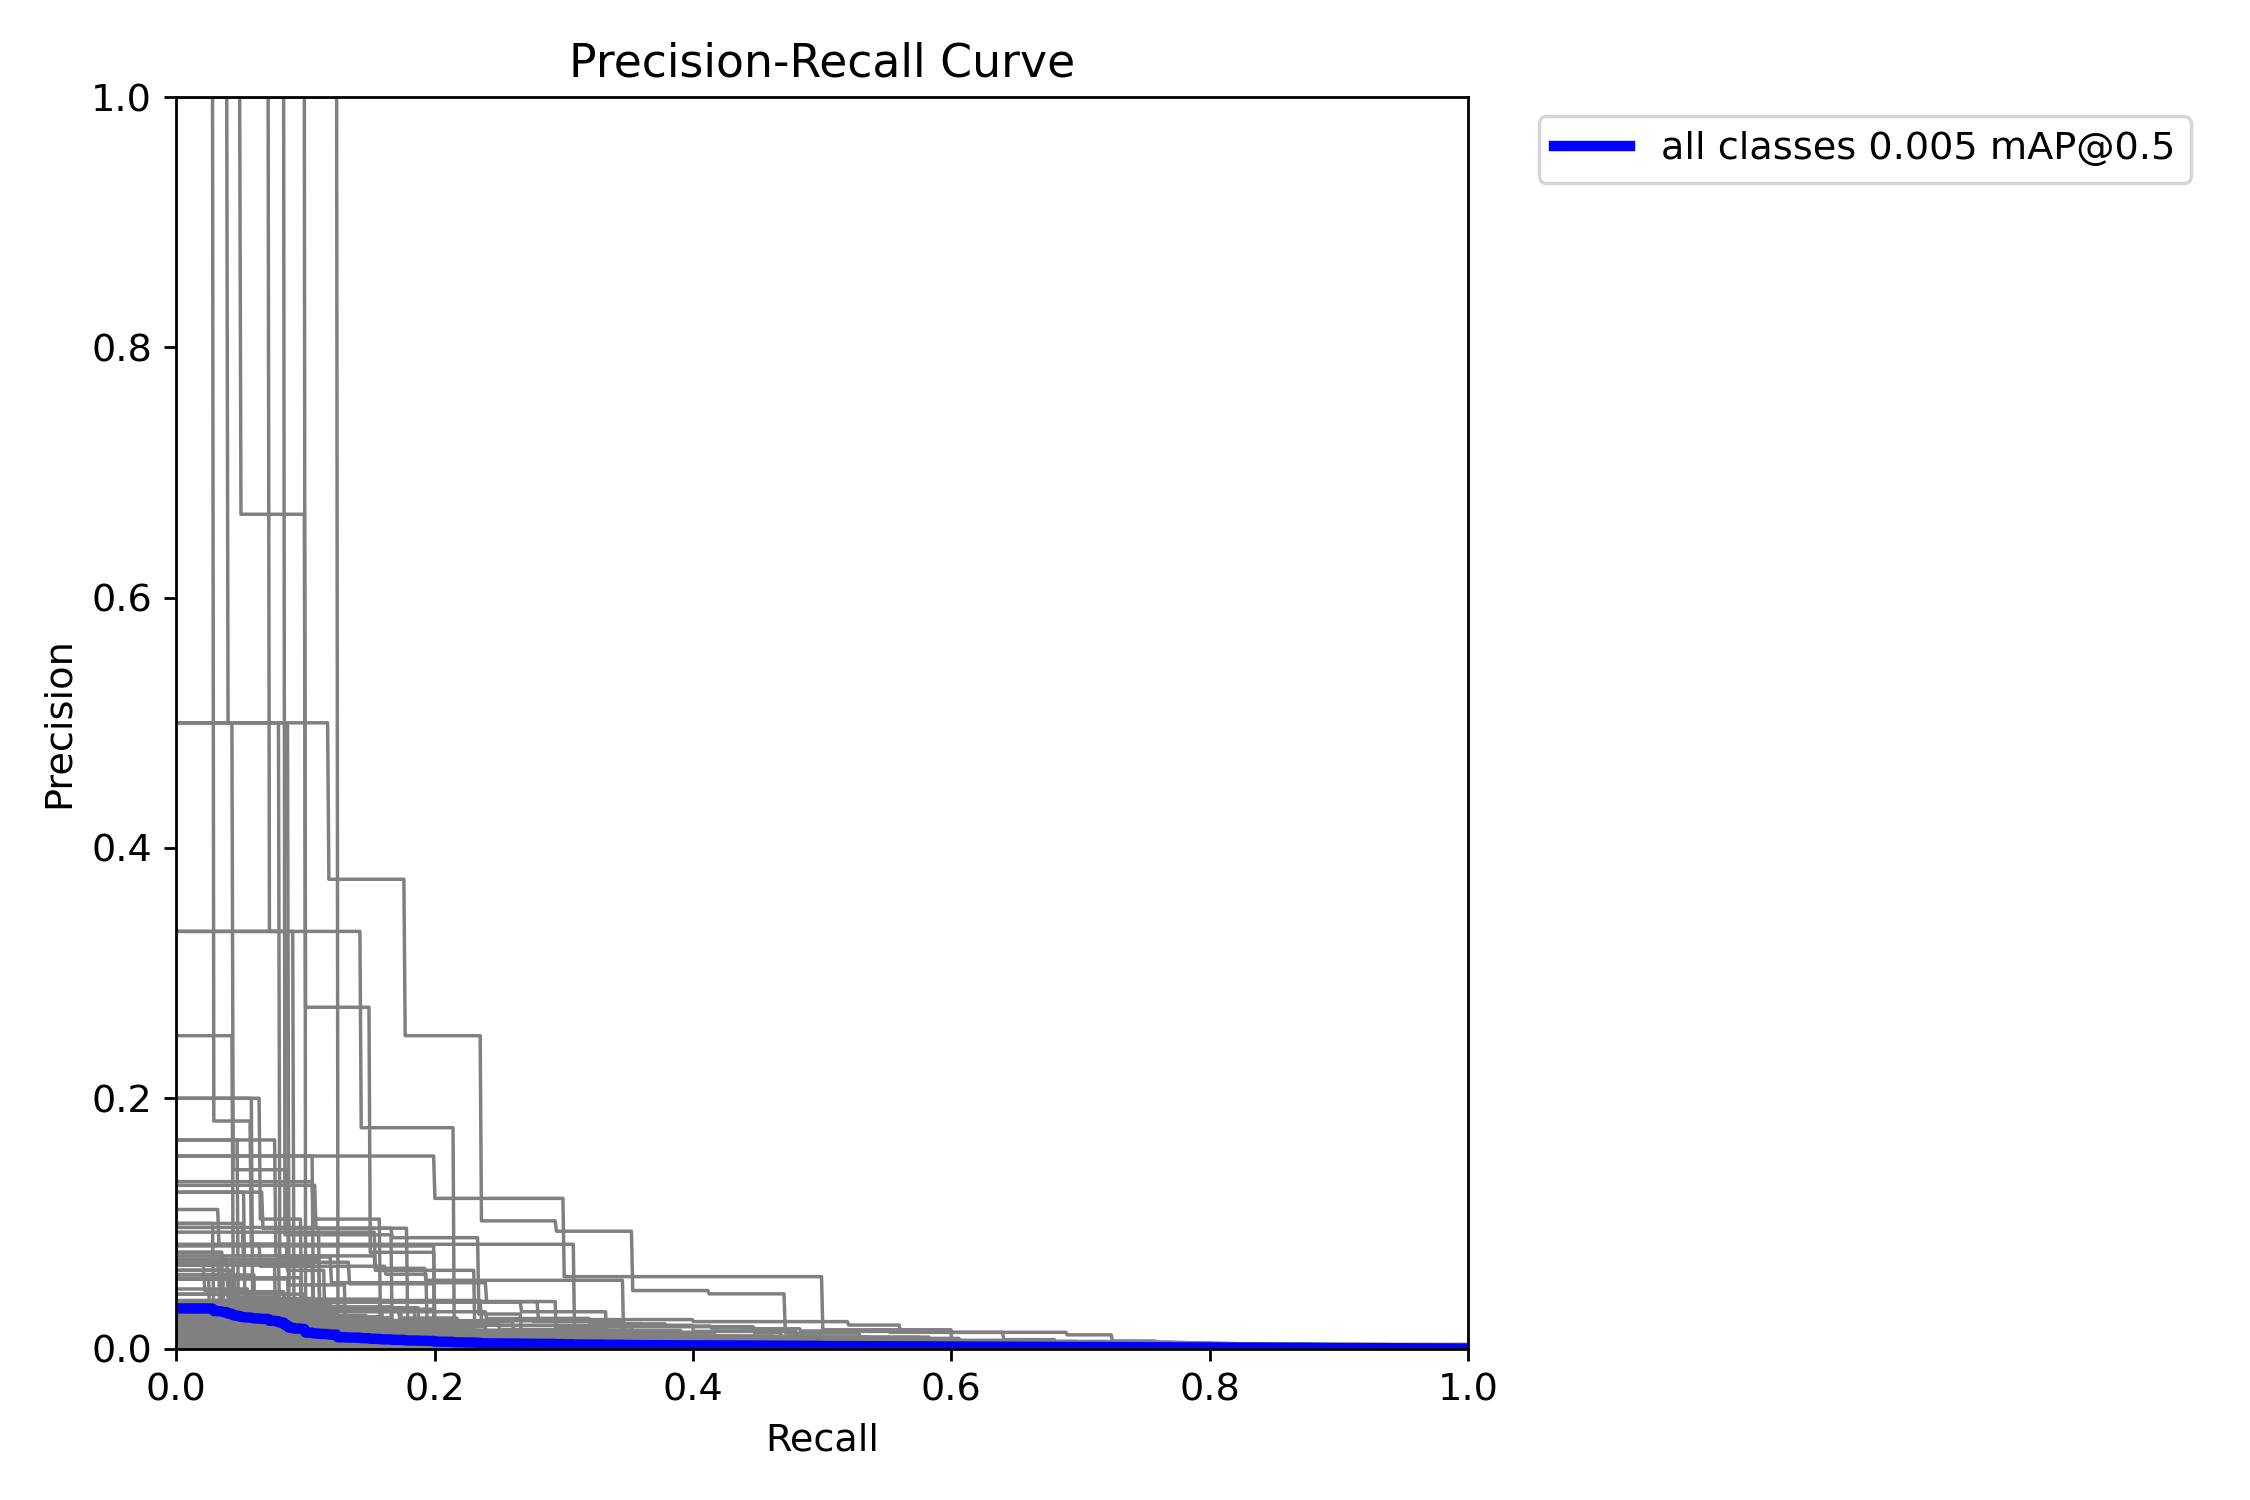

In [22]:
Image(filename='/content/runs/detect/val/PR_curve.png', width=600)

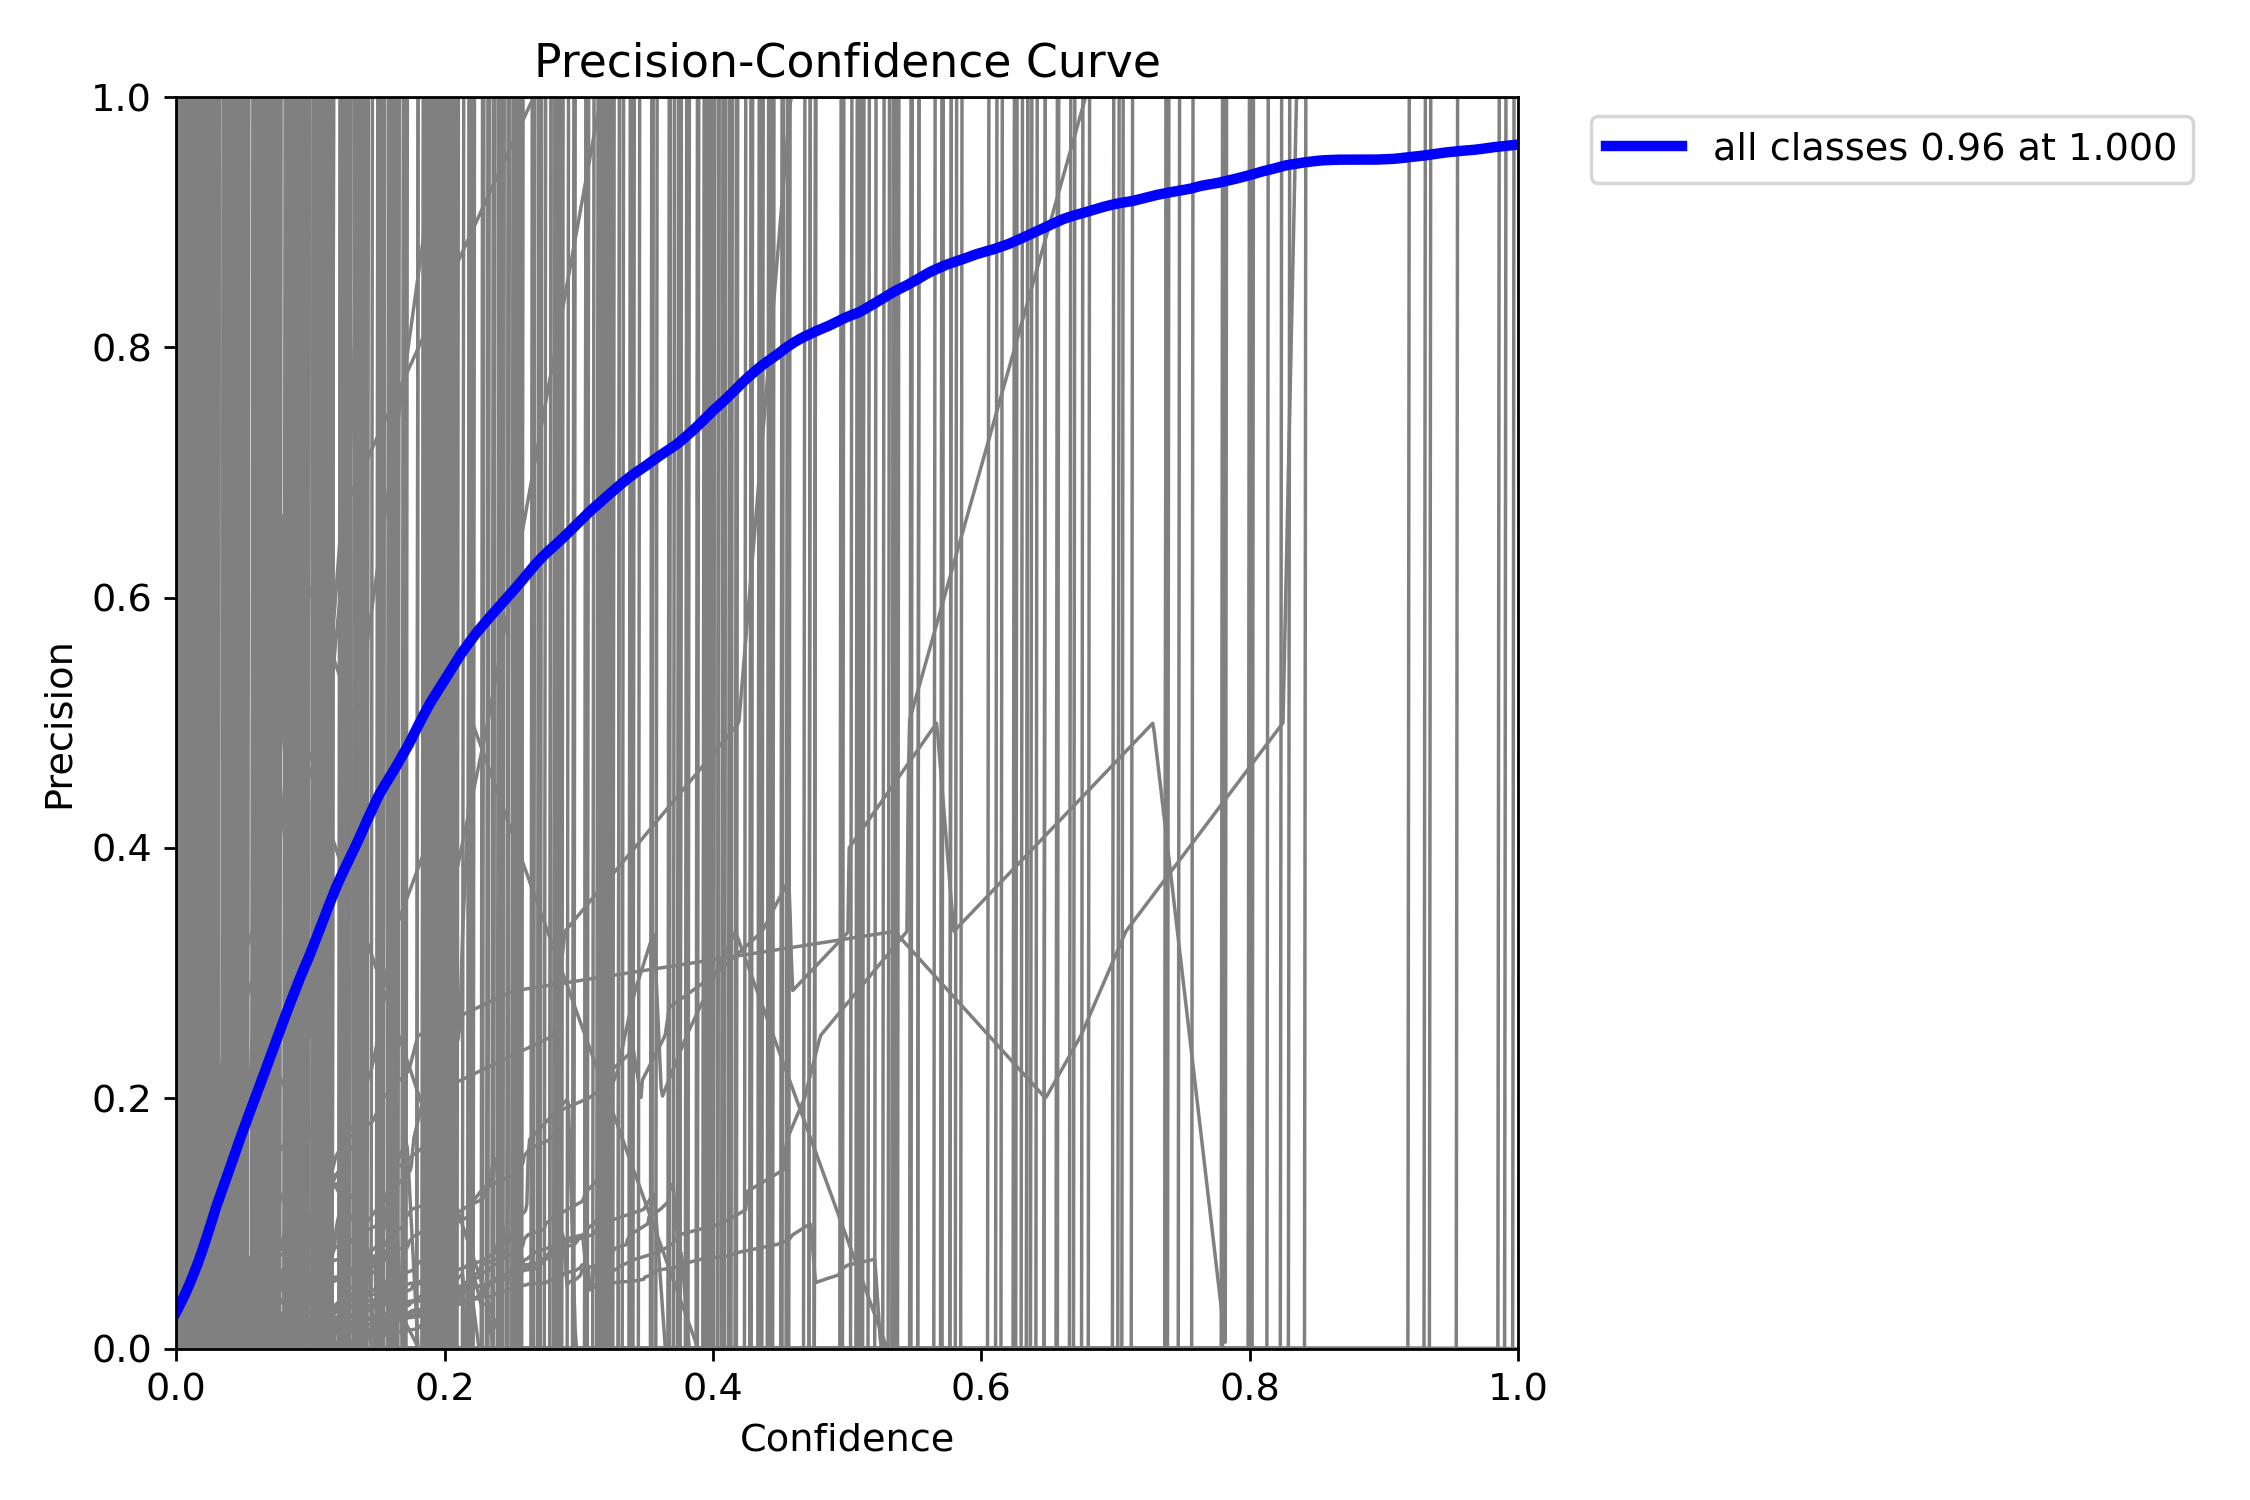

In [23]:
Image(filename='/content/runs/detect/val/P_curve.png', width=600)

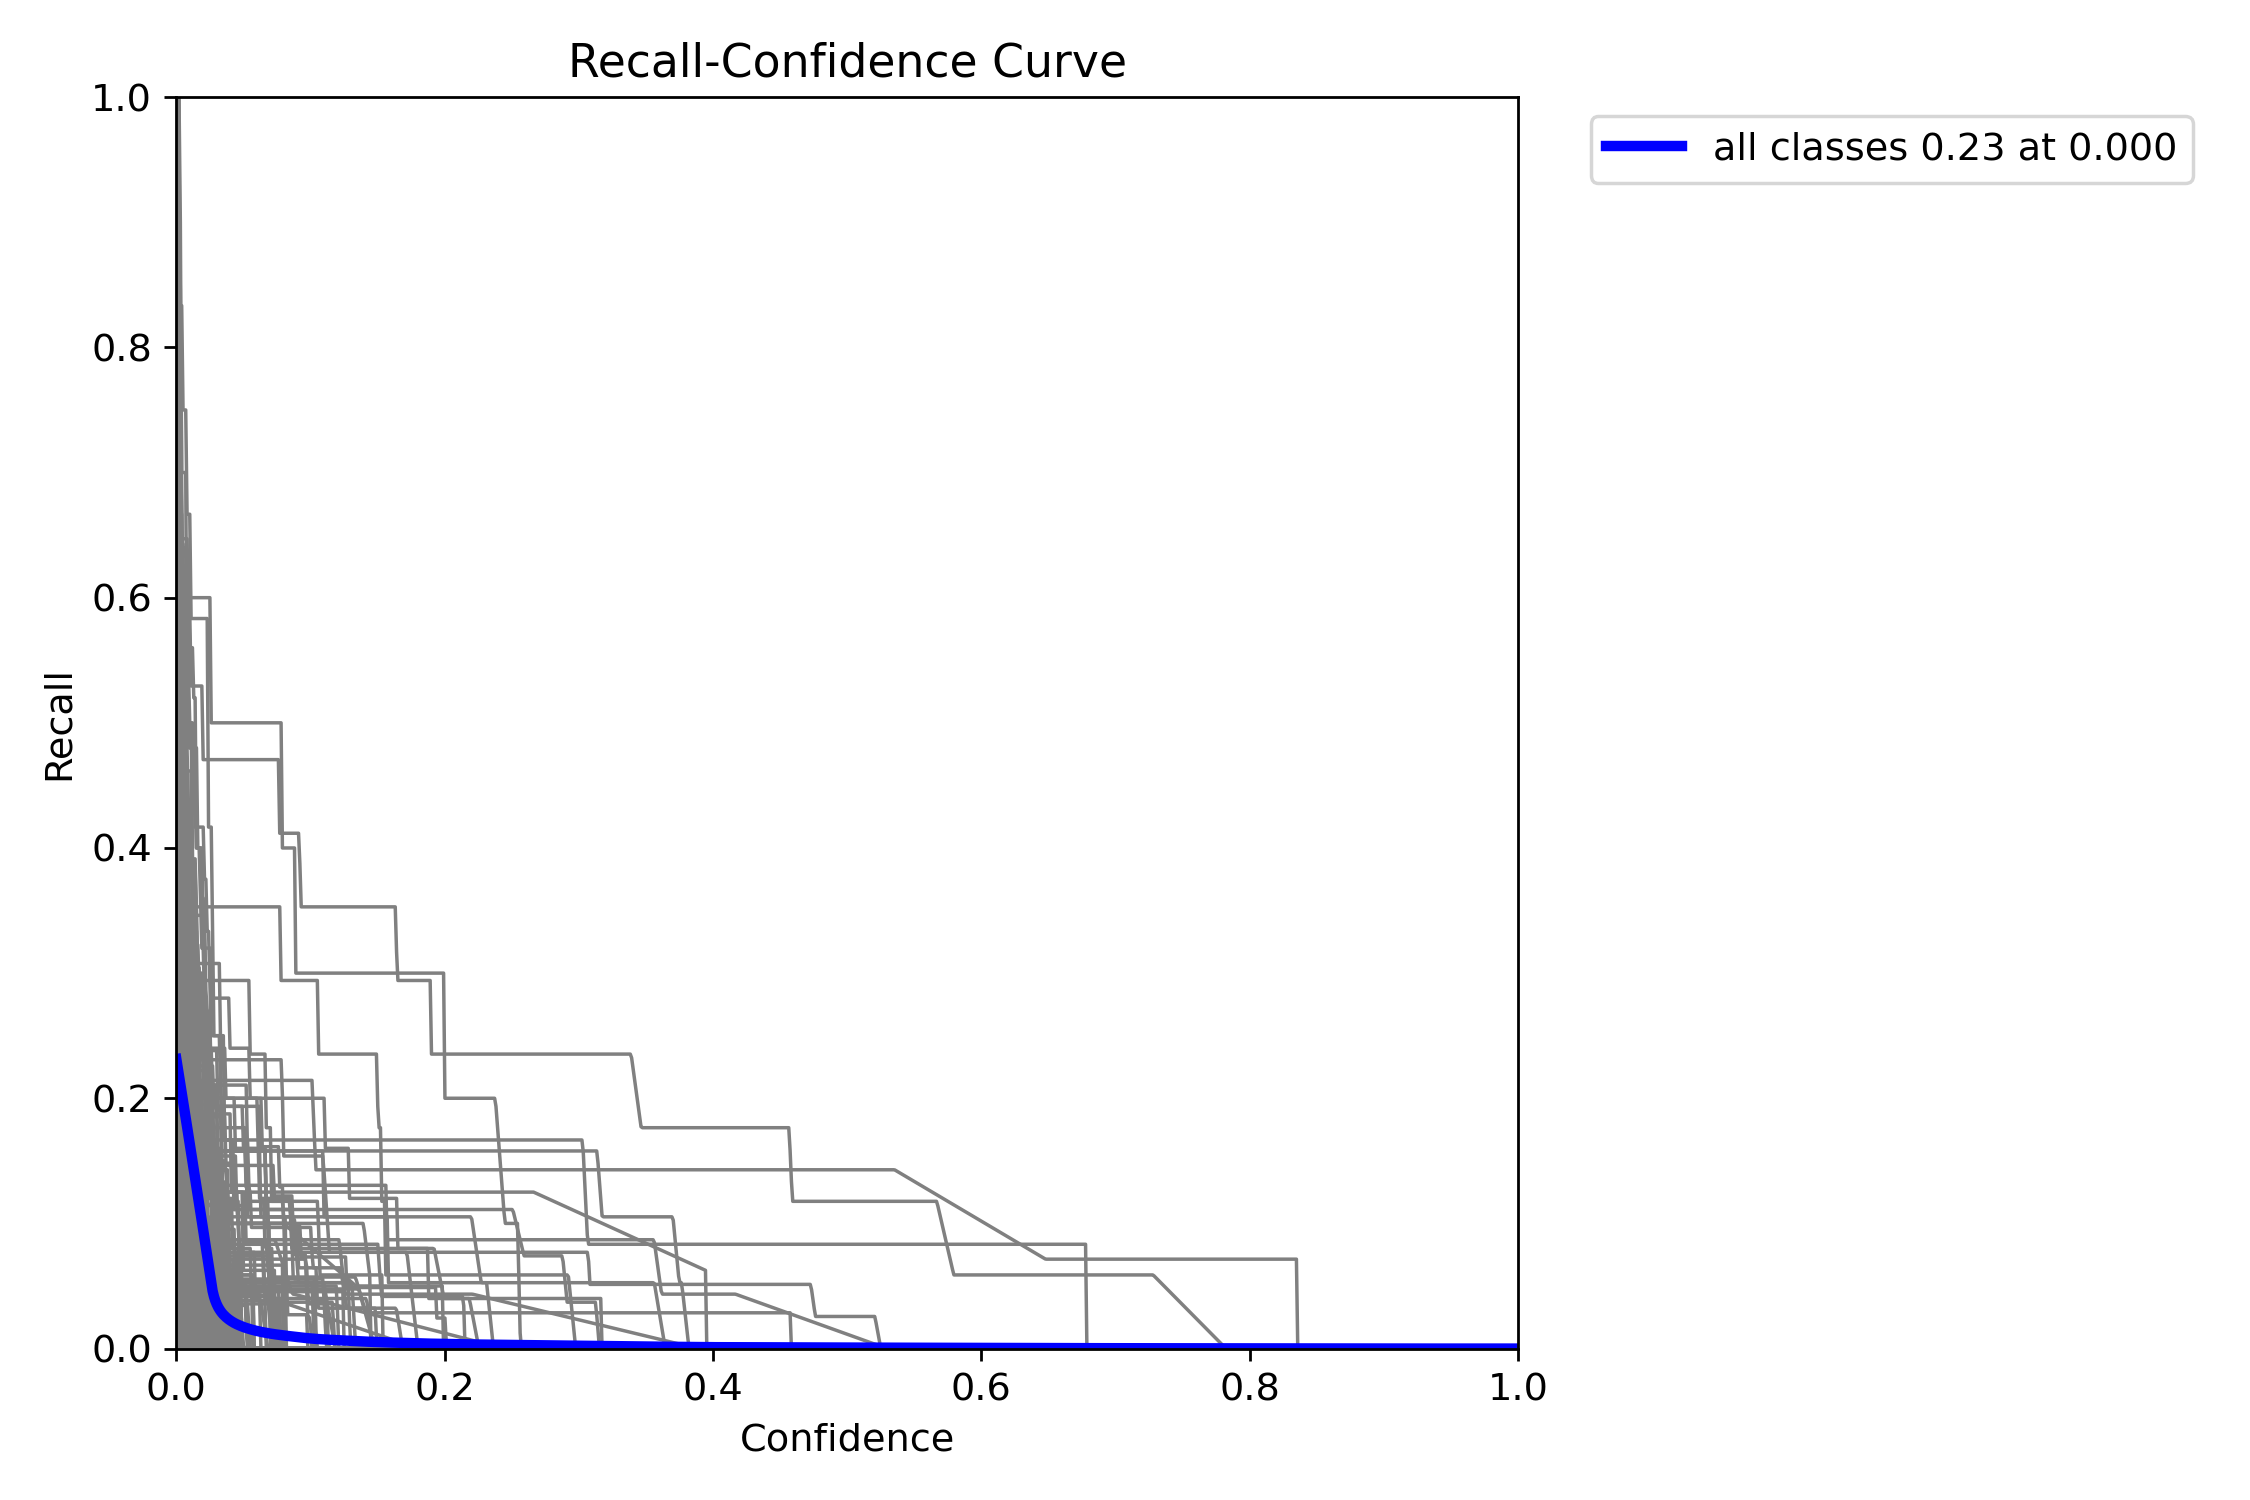

In [24]:
Image(filename='/content/runs/detect/val/R_curve.png', width=600)